### importing the necessary python libraries and the data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('books.csv',error_bad_lines=False)
df=df.drop('Unnamed: 12',axis=1)

In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9.78E+12,eng,870,2153167,29221,09/01/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11/01/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9.78E+12,eng,435,2339585,36325,05/01/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9.78E+12,eng,2690,41428,164,9/13/2004,Scholastic


### Data Exploration

In [4]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [5]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


In [7]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [8]:
book_aut=df.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
book_aut

,title
authors,
P.G. Wodehouse,40
Stephen King,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28


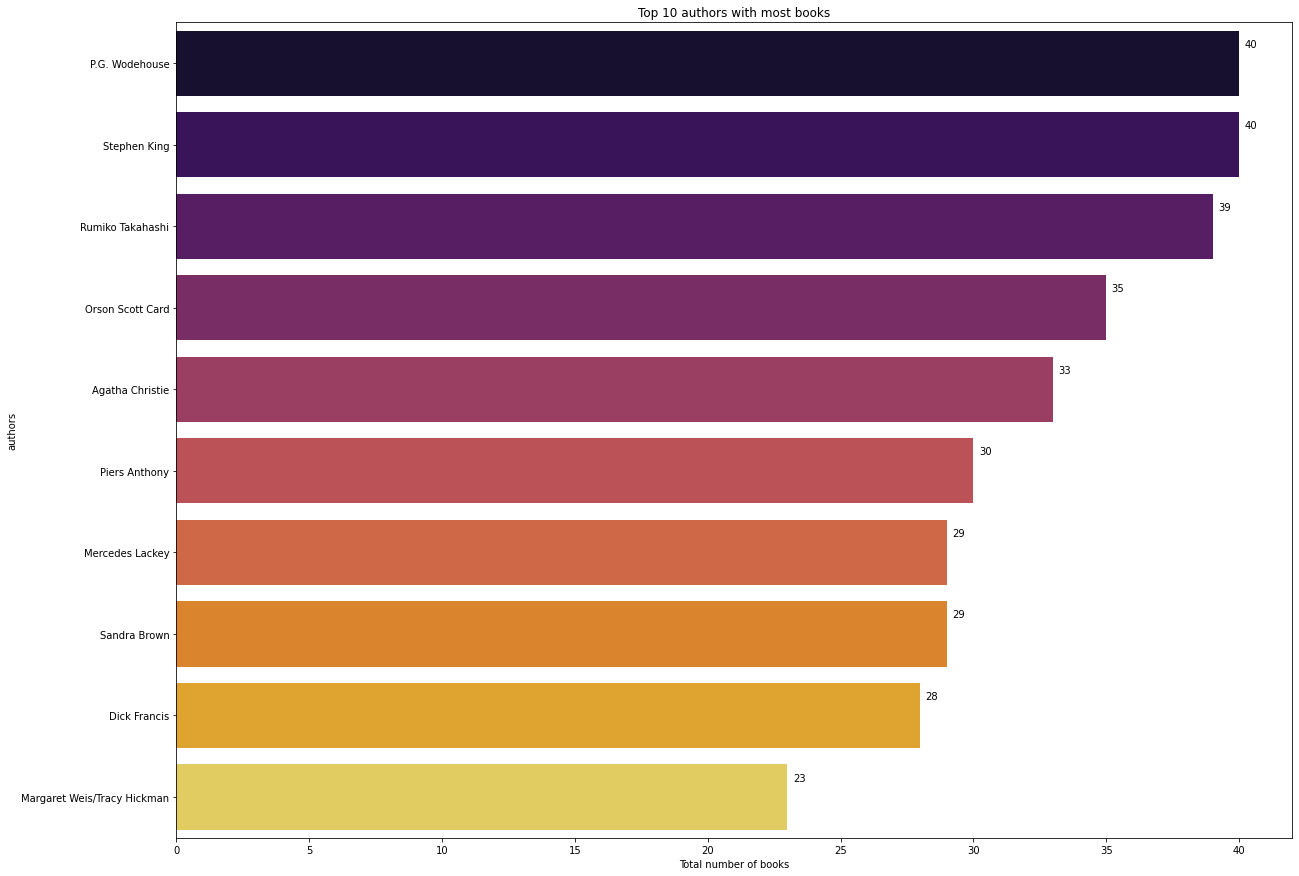

In [9]:
plt.figure(figsize=(20,15))
ax=sns.barplot(book_aut['title'],book_aut.index,palette='inferno')
ax.set_title('Top 10 authors with most books')
ax.set_xlabel("Total number of books")

total=[]

for i in ax.patches:
    total.append(i.get_width())
    
totals=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2,i.get_y()+.2,str(round(i.get_width())))
    
plt.show()

In [10]:
most_rated=df.sort_values('ratings_count', ascending=False).head(10).set_index('title')
most_rated

,bookID,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
title,,,,,,,,,,,
Twilight (Twilight #1),41865,Stephenie Meyer,3.59,316015849,9.78E+12,eng,501,4597666,94265,09/06/2006,Little Brown and Company
The Hobbit or There and Back Again,5907,J.R.R. Tolkien,4.27,618260307,9.78E+12,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
The Catcher in the Rye,5107,J.D. Salinger,3.8,316769177,9.78E+12,eng,277,2457092,43499,1/30/2001,Back Bay Books
Angels & Demons (Robert Langdon #1),960,Dan Brown,3.89,1416524797,9.78E+12,eng,736,2418736,21303,04/01/2006,Pocket Books
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),5,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9.78E+12,eng,435,2339585,36325,05/01/2004,Scholastic Inc.
Harry Potter and the Chamber of Secrets (Harry Potter #2),15881,J.K. Rowling/Mary GrandPrÃ©,4.42,439064864,9.78E+12,eng,341,2293963,34692,06/02/1999,Arthur A. Levine Books / Scholastic Inc.
Harry Potter and the Order of the Phoenix (Harry Potter #5),2,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9.78E+12,eng,870,2153167,29221,09/01/2004,Scholastic Inc.
The Fellowship of the Ring (The Lord of the Rings #1),34,J.R.R. Tolkien,4.36,618346252,9.78E+12,eng,398,2128944,13670,09/05/2003,Houghton Mifflin Harcourt
Animal Farm,7613,George Orwell/Boris Grabnar/Peter Å kerl,3.93,452284244,9.78E+12,eng,122,2111750,29677,05/06/2003,NAL


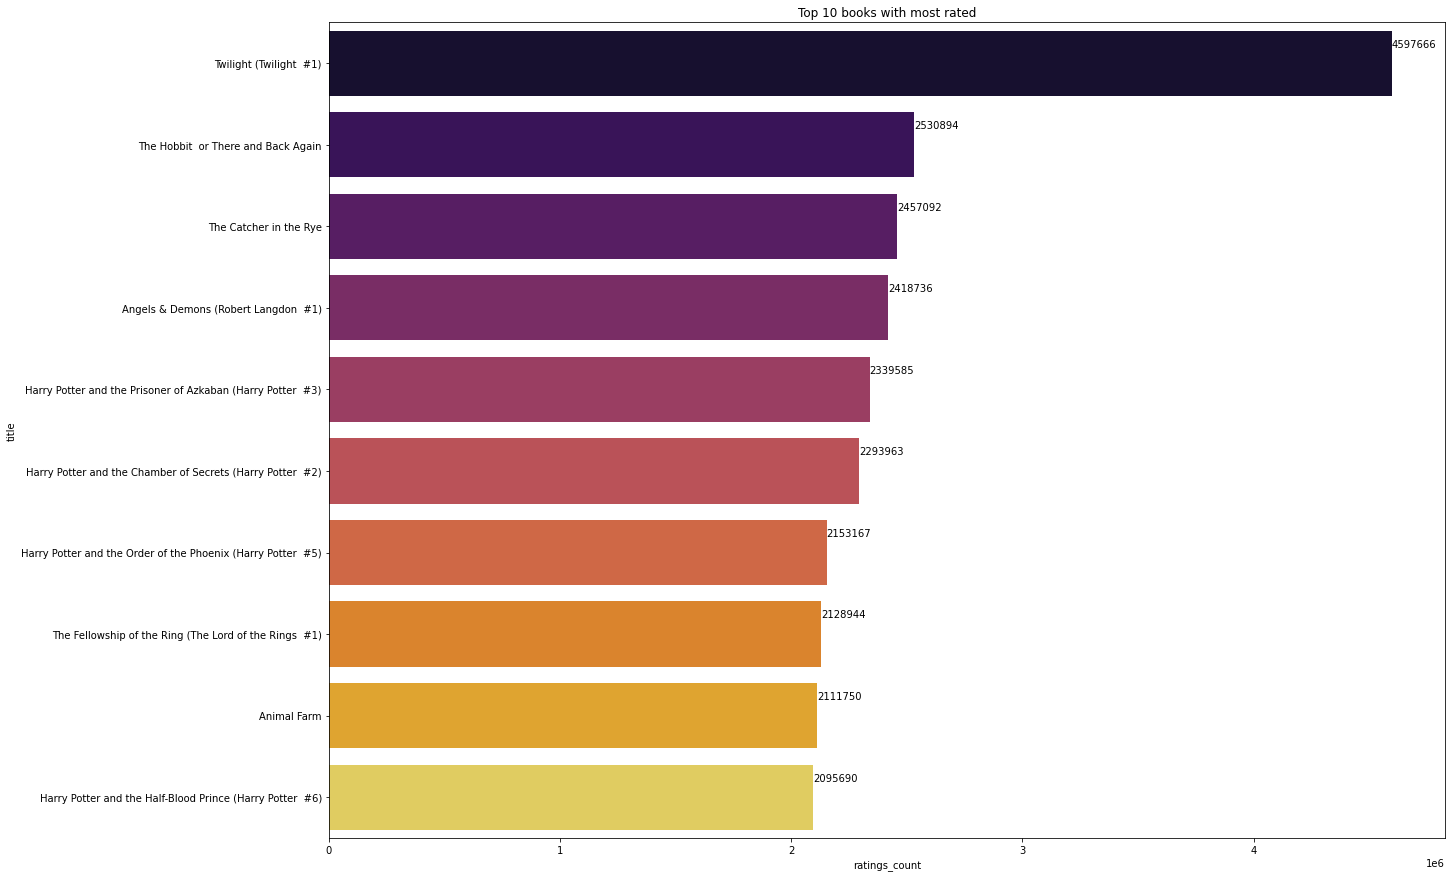

In [11]:
plt.figure(figsize=(20,15))
ax=sns.barplot(most_rated['ratings_count'],most_rated.index,palette='inferno')
ax.set_title('Top 10 books with most rated')


total=[]

for i in ax.patches:
    total.append(i.get_width())
    
totals=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2,i.get_y()+.2,str(round(i.get_width())))
    
plt.show()

In [12]:
df=df.sort_values('average_rating').reset_index()
df=df.iloc[4:]
df

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4,4242,15186,American Film Guide,Frank N. Magill,0,893562505,9.78E+12,eng,5,0,0,01/01/1983,Salem Press Inc
5,375,1302,Juiced Official Strategy Guide,Doug Walsh,0,744005612,9.78E+12,eng,112,0,0,06/01/2005,BradyGames
6,4678,16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0,415940478,9.78E+12,eng,386,0,0,11/08/2002,Routledge
7,7637,29404,Your Child and Jesus: A Family Activity Book,Rick Osborne/Kevin Miller,0,080242855X,9.78E+12,eng,112,0,0,9/13/1999,Moody Publishers
8,2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0,1932206086,9.78E+12,eng,304,0,0,01/01/2003,Frederick P. Lenz Foundation for American Budd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,10266,41639,Bill Gates: Computer Legend (Famous Lives),Sara Barton-Wood,5,739844326,9.78E+12,eng,48,0,0,11/01/2001,Raintree
11123,6778,25426,Delwau Duon: Peintiadau Nicholas Evans = Symph...,Nicholas Evans/Rhonda Evans,5,862431352,9.78E+12,wel,150,1,0,6/22/1987,Y Lolfa
11124,8547,32823,Fanning the Flame: Bible Cross and Mission,Chris Green/Chris Wright/Paul Douglas Gardner,5,310249872,9.78E+12,eng,336,1,1,6/17/2003,Zondervan
11125,9897,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5,1590529626,9.78E+12,eng,240,2,0,10/16/2007,Multnomah


Text(0.5, 0, 'average_rating')

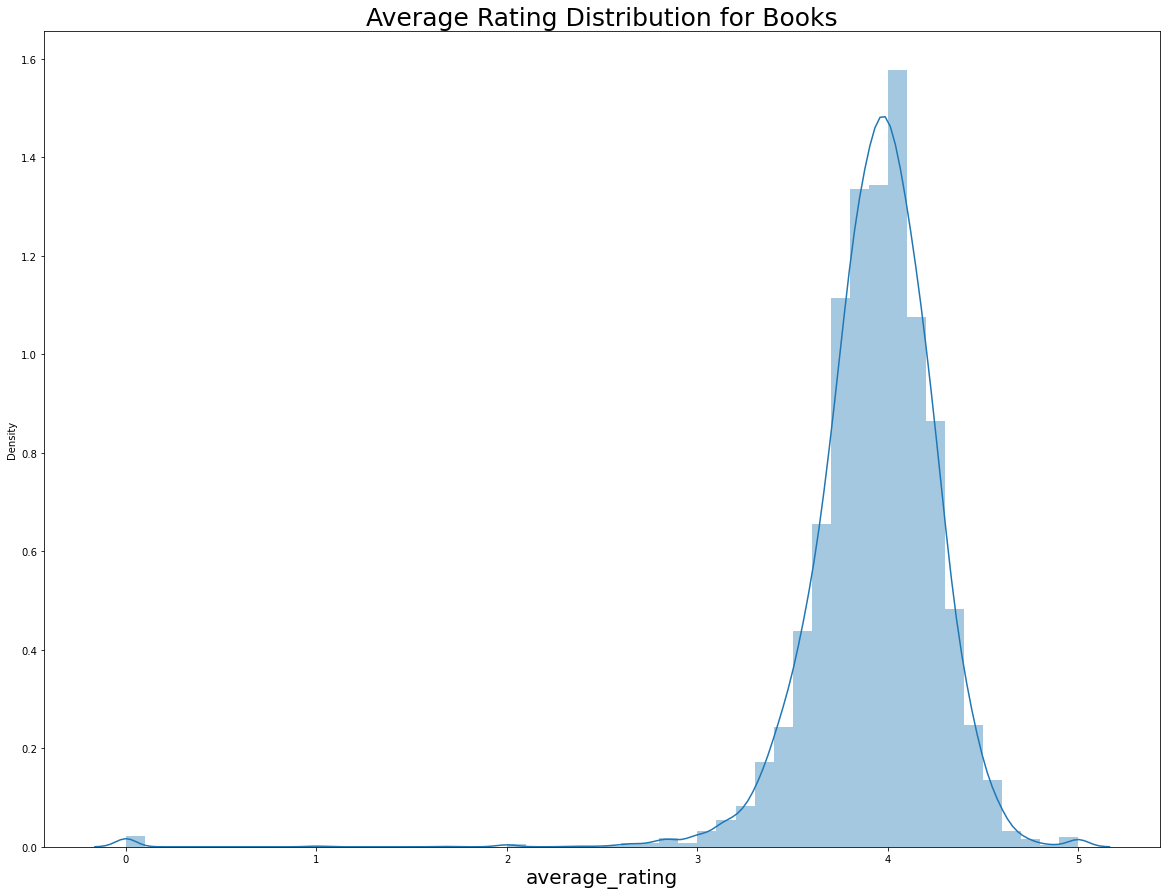

In [13]:
df.average_rating=df.average_rating.astype(float)
fig, ax=plt.subplots(figsize=(20,15))

sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average Rating Distribution for Books',fontsize=25)
ax.set_xlabel('average_rating',fontsize=20)

In [14]:
df.tail(50)

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11077,9789,39201,Getting a Grip on the Basics: Building a Firm ...,Beth A. Jones,4.67,1577948262,9.78E+12,eng,124,9,0,05/01/2006,Harrison House
11078,3510,12789,Falling Angels (Luc Actar #1),Melissa M. Garcia,4.67,595377106,9.78E+12,eng,216,1,0,2/14/2006,iUniverse
11079,7045,26805,The Sibley Field Guide to Birds of Western Nor...,David Allen Sibley,4.69,679451218,9.78E+12,en-US,473,730,36,4/29/2003,Alfred A. Knopf
11080,6594,24818,The Days Are Just Packed,Bill Watterson,4.69,836217357,9.78E+12,eng,176,20308,244,09/01/1993,Andrews McMeel Publishing
11081,8365,32160,Cook's Illustrated 2003 (Cook's Illustrated An...,Cook's Illustrated Magazine,4.69,936184728,9.78E+12,eng,212,26,0,11/15/2003,Boston Common Press
11082,8186,31401,A Wife After God's Own Heart Growth and Study ...,Elizabeth George,4.69,736911685,9.78E+12,eng,160,9,1,01/01/2004,Harvest House Publishers
11083,10941,44826,The Price of the Ticket: Collected Nonfiction ...,James Baldwin,4.70,312643063,9.78E+12,eng,712,404,30,9/15/1985,St. Martin's Press
11084,306,955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,802415318,9.78E+12,eng,0,22,4,01/01/2005,Moody Publishers
11085,6500,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9.78E+12,eng,6576,1338,81,10/17/2004,W. W. Norton Company
11086,5616,20749,Study Bible: NIV,Anonymous,4.70,310929555,9.78E+12,eng,2198,4166,186,10/01/2002,Zondervan Publishing House


<Figure size 1440x1440 with 0 Axes>

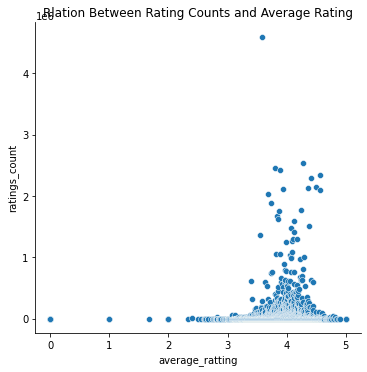

In [15]:
plt.figure(figsize=(20,20))
ax=sns.relplot(data=df,x="average_rating", y="ratings_count")
plt.title("Rlation Between Rating Counts and Average Rating")
ax.set_axis_labels("average_ratting","ratings_count")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 4 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               11123 non-null  int64  
 1   bookID              11123 non-null  int64  
 2   title               11123 non-null  object 
 3   authors             11123 non-null  object 
 4   average_rating      11123 non-null  float64
 5   isbn                11123 non-null  object 
 6   isbn13              11123 non-null  object 
 7   language_code       11123 non-null  object 
 8   num_pages           11123 non-null  object 
 9   ratings_count       11123 non-null  int64  
 10  text_reviews_count  11123 non-null  int64  
 11  publication_date    11123 non-null  object 
 12  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [17]:
df=df.sort_values('num_pages',ascending=False).reset_index()
df=df.iloc[4:]
df.head(20)

,level_0,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4,3807,3137,11525,1 000 Places to See Before You Die,Patricia Schultz,3.85,761104844,9.78E+12,eng,992,36303,439,5/22/2003,Workman Publishing Company
5,10285,7371,28389,Marcel Proust: A Life,William C. Carter,4.33,300094000,9.78E+12,eng,992,14,4,02/08/2002,Yale University Press
6,6654,4621,16619,Democracy in America,Alexis de Tocqueville/Isaac Kramnick/Gerald Bevan,4.02,140447601,9.78E+12,eng,992,18925,523,4/24/2003,Penguin Classics
7,10700,5488,19809,The Last Lion: Winston Spencer Churchill: Visi...,William Manchester,4.42,385313489,9.78E+12,eng,992,9659,467,04/01/1984,Delta
8,7086,5453,19670,Debt of Honor (Jack Ryan #7),Tom Clancy,4.05,425147584,9.78E+12,eng,990,39521,469,08/01/1995,Berkley Books
9,10116,8222,31580,In Search of Duende,Federico GarcÃ­a Lorca/Norman Thomas di Giovanni,4.30,811213765,9.78E+12,eng,99,616,36,4/17/1998,New Directions
10,10501,10961,44921,Explode the Code 1,Nancy Hall,4.37,838814603,9.78E+12,eng,99,89,10,01/01/2001,School Specialty Publishing
11,5222,1954,7015,A Midsummer Night's Dream,William Shakespeare/Roma Gill,3.94,198320213,9.78E+12,eng,99,14,3,8/15/2002,Oxford University Press USA
12,889,8872,34307,Aches & Pains,Maeve Binchy/Wendy Shea,3.53,385335105,9.78E+12,en-US,99,356,30,6/13/2000,Delacorte Press
13,1742,6651,24978,Inside Job,Connie Willis,3.67,1596060247,9.78E+12,eng,99,1442,180,06/01/2005,Subterranean Press


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 4 to 11122
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   level_0             11119 non-null  int64  
 1   index               11119 non-null  int64  
 2   bookID              11119 non-null  int64  
 3   title               11119 non-null  object 
 4   authors             11119 non-null  object 
 5   average_rating      11119 non-null  float64
 6   isbn                11119 non-null  object 
 7   isbn13              11119 non-null  object 
 8   language_code       11119 non-null  object 
 9   num_pages           11119 non-null  object 
 10  ratings_count       11119 non-null  int64  
 11  text_reviews_count  11119 non-null  int64  
 12  publication_date    11119 non-null  object 
 13  publisher           11119 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.2+ MB


<Figure size 1440x1440 with 0 Axes>

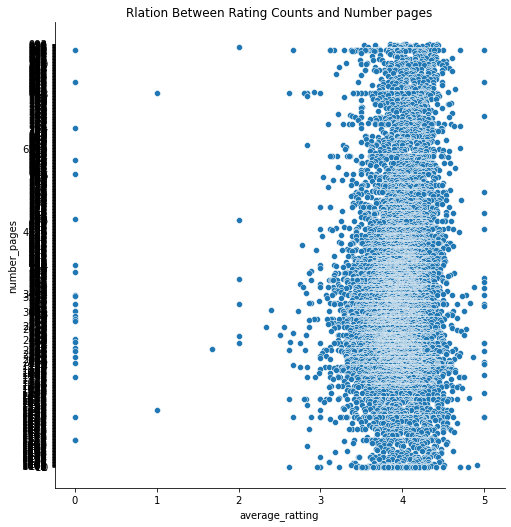

In [19]:
plt.figure(figsize=(20,20))
ax=sns.relplot(x="average_rating", y="num_pages",data=df,sizes=(400,200),height=7)
plt.title("Rlation Between Rating Counts and Number pages")

ax.set_axis_labels("average_ratting","number_pages")

### Data Preperation

In [20]:
df2=df.copy()

In [21]:
df2.loc[(df2["average_rating"]>=0)&(df2["average_rating"]<=1),"rating between"]="between 0 and 1"
df2.loc[(df2["average_rating"]>1)&(df2["average_rating"]<=2),"rating between"]="between 1 and 2"
df2.loc[(df2["average_rating"]>2)&(df2["average_rating"]<=3),"rating between"]="between 2 and 3"
df2.loc[(df2["average_rating"]>3)&(df2["average_rating"]<=4),"rating between"]="between 3 and 4"
df2.loc[(df2["average_rating"]>=4)&(df2["average_rating"]<=5),"rating between"]="between 4 and 5"

In [22]:
df2.sort_values("average_rating")

,level_0,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating between
10465,18,6862,25841,The Road To War 1933 39,Andrew Hunt,0.0,340774770,9.78E+12,eng,128,0,0,04/01/2000,Hodder & Stoughton Educational Division,between 0 and 1
7497,21,7402,28467,Sclerotherapy and vein treatment,Robert A. Weiss/Margaret A. Weiss/Karen L. Bea...,0.0,71485422,9.78E+12,eng,248,0,0,12/30/2011,McGraw-Hill Professional Publishing,between 0 and 1
8871,11,987,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,189044717X,9.78E+12,eng,200,0,0,10/13/2000,Grove Press Open City Books,between 0 and 1
6598,12,6383,24010,"Laguna I Love You: The Best of ""Our Town""",John Weld/Phil Interlandi,0.0,1564741575,9.78E+12,eng,285,0,0,03/01/1996,Fithian Press,between 0 and 1
5134,25,7147,27416,Mythographi Graeci 1: Apollodori Bibliotheca ...,Apollodorus/Richard Wagner,0.0,3598715439,9.78E+12,grc,335,0,0,7/15/1998,K.G. Saur Verlag,between 0 and 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7814,11107,9328,36853,Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll/Alisa Klayman-Grodsky/Eric ...,5.0,786845031,9.78E+12,eng,24,2,1,02/01/2003,Disney Press,between 4 and 5
1606,11106,6250,23552,The New Big Book of America,Todd Davis/Marc Frey,5.0,762412631,9.78E+12,eng,56,2,1,3/21/2002,Courage Books,between 4 and 5
7765,11125,9897,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5.0,1590529626,9.78E+12,eng,240,2,0,10/16/2007,Multnomah,between 4 and 5
1952,11115,5650,20957,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,5.0,567044718,9.78E+12,eng,512,1,0,12/07/2005,T&T Clark Int'l,between 4 and 5


In [23]:
rating_df=pd.get_dummies(df2['rating between'])
language_df=pd.get_dummies(df2['language_code'])

In [24]:
rating_df

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
4,0,0,0,1,0
5,0,0,0,0,1
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,0,1
...,...,...,...,...,...
11118,0,0,0,1,0
11119,0,0,0,0,1
11120,0,0,0,1,0
11121,0,0,0,0,1


In [25]:
language_df

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
feature=pd.concat([rating_df,language_df,df2['average_rating'],df2['ratings_count']],axis=1)

In [27]:
feature

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.85,36303
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.33,14
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.02,18925
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,9659
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.05,39521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.78,1
11119,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.41,3598
11120,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.83,5147
11121,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.16,202


### Building Book Recommendation System

In [28]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()

feature=minmax.fit_transform(feature)

In [29]:
feature

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.70000000e-01, 7.89596286e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.66000000e-01, 3.04502328e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.04000000e-01, 4.11621897e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.66000000e-01, 1.11948106e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.32000000e-01, 4.39353359e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.32000000e-01, 5.80729440e-05]])

In [30]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

model=neighbors.NearestNeighbors(n_neighbors=8, algorithm="ball_tree")
model.fit(feature)
dist,idlist=model.kneighbors(feature)

In [31]:
dist

array([[0.00000000e+00, 1.14318874e-03, 1.23954198e-03, ...,
        2.20785938e-03, 2.36044752e-03, 2.39056078e-03],
       [0.00000000e+00, 0.00000000e+00, 1.08750831e-06, ...,
        1.74001330e-06, 2.39251829e-06, 2.39251829e-06],
       [0.00000000e+00, 5.98129573e-05, 3.70840335e-04, ...,
        9.54397296e-04, 1.06706316e-03, 1.20539422e-03],
       ...,
       [0.00000000e+00, 1.60951230e-05, 7.00355354e-05, ...,
        9.33082133e-05, 1.32676014e-04, 1.46596121e-04],
       [0.00000000e+00, 4.35003326e-07, 2.82752162e-06, ...,
        5.22003991e-06, 1.15275881e-05, 1.26150964e-05],
       [0.00000000e+00, 1.00050765e-05, 2.76227112e-05, ...,
        2.00041353e-03, 2.00055171e-03, 2.00074496e-03]])

In [32]:
idlist

array([[    0,  3328, 10418, ...,  9250,  3234,  7010],
       [    1,  7812, 10640, ...,  1607,  5669,   274],
       [    2,  2034,  4319, ...,   254,  1733,   879],
       ...,
       [11116,  1636,  8806, ...,  4973,  8980,  2841],
       [11117,  3873,  1439, ..., 10321,  9520,  6404],
       [11118,  4208,   713, ...,  1686, 10922,  2933]], dtype=int64)

In [33]:
def bookRecom(name):
    book_list=[]
    book_id=df2[df2['title']==name].index
    book_id=book_id[0]
    for new in idlist[book_id]:
        book_list.append(df2.loc[new].title)
    return book_list

Book_name=bookRecom('Willem de Kooning: Late Paintings')
Book_name

['Willem de Kooning: Late Paintings',
 "Complications: A Surgeon's Notes on an Imperfect Science",
 'War Comes to Willy Freeman (Arabus Family Saga  #1)',
 'Venice: Tales of the City',
 'The Best Short Stories of O. Henry',
 'Magician: Apprentice (The Riftwar Saga  #1)',
 'Sailing from Byzantium: How a Lost Empire Shaped the World',
 'The Social Contract and The First and Second Discourses']